<a href="https://colab.research.google.com/github/OlekanmaVictoria/Data-science-Portfolio/blob/main/Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data source: https://www.kaggle.com/c/tmdb-box-office-prediction/data

# Problem statement

In a world… where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate."

We are presented with metadata on over 7,000 past films from The Movie Database to try and predict their overall worldwide box office revenue. Data points provided include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries.

# Data description

In this dataset, we are provided with 7398 movies and a variety of metadata obtained from The Movie Database (TMDB). Movies are labeled with id. Data points include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries.

We are predicting the worldwide revenue for 4398 movies in the test file.

Note - many movies are remade over the years, therefore it may seem like multiple instance of a movie may appear in the data, however they are different and should be considered separate movies. In addition, some movies may share a title, but be entirely unrelated.

E.g. The Karate Kid (id: 5266) was released in 1986, while a clearly (or maybe just subjectively) inferior remake (id: 1987) was released in 2010. Also, while the Frozen (id: 5295) released by Disney in 2013 may be the household name, don't forget about the less-popular Frozen (id: 139) released three years earlier about skiers who are stranded on a chairlift...

## Loading the dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
box_office = pd.read_csv('/test.csv')
box_office = pd.read_csv('/train.csv')

In [ ]:
box_office.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
box_office.tail()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,...,1/16/04,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For the most cautious man on Earth, life is ab...",Along Came Polly,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386
2999,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,...,9/22/11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155


In [ ]:
box_office.describe(include='all')

NameError: ignored

In [ ]:
box_office.shape

(3000, 23)

In [ ]:
box_office.drop_duplicates(keep='first', inplace=True)
box_office.shape

(3000, 23)

In [ ]:
box_office.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [ ]:
box_office.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

## Data cleaning

In [ ]:
box_office.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [ ]:
box_office.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
box_office = box_office.drop(columns=['id','belongs_to_collection','homepage','original_title','poster_path','production_companies','overview','imdb_id','production_countries','tagline','Keywords','cast','crew'], axis=1)

In [ ]:
box_office.columns

Index(['budget', 'genres', 'original_language', 'popularity', 'release_date',
       'runtime', 'spoken_languages', 'status', 'title', 'revenue'],
      dtype='object')

In [ ]:
box_office['release_date'] = pd.to_datetime(box_office['release_date'])

In [ ]:
box_office['day'] = box_office['release_date'].dt.day

In [ ]:
box_office['month'] = box_office['release_date'].dt.month

In [ ]:
box_office['year'] = box_office['release_date'].dt.year

In [ ]:
box_office = box_office.drop(['release_date'], axis=1)

In [ ]:
box_office.head()

,budget,genres,original_language,popularity,runtime,spoken_languages,status,title,revenue,day,month,year
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,12314651,20,2,2015
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,95149435,6,8,2004
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,13092000,10,10,2014
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,16000000,9,3,2012
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,3923970,5,2,2009


In [ ]:
box_office.isna().sum()

budget                0
genres                7
original_language     0
popularity            0
runtime               2
spoken_languages     20
status                0
title                 0
revenue               0
day                   0
month                 0
year                  0
dtype: int64

In [ ]:
box_office['genres'].mode()[0]

"[{'id': 18, 'name': 'Drama'}]"

In [ ]:
box_office['genres'].fillna(box_office['genres'].mode()[0], inplace=True )

In [ ]:
box_office['runtime'].mean()

107.85657104736491

In [ ]:
box_office['runtime'].fillna(box_office['runtime'].mean(), inplace=True)

In [ ]:
box_office['spoken_languages'].mode()[0]

"[{'iso_639_1': 'en', 'name': 'English'}]"

In [ ]:
box_office['spoken_languages'].fillna(box_office['spoken_languages'].mode()[0], inplace=True)

In [ ]:
box_office.isna().sum()

budget               0
genres               0
original_language    0
popularity           0
runtime              0
spoken_languages     0
status               0
title                0
revenue              0
day                  0
month                0
year                 0
dtype: int64

## Exploratory data analysis

In [ ]:
box_office.describe()

,budget,popularity,runtime,revenue,day,month,year
count,3.000000e+03,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,2.253133e+07,8.463274,107.856571,6.672585e+07,15.046333,6.775333,2005.313000
std,3.702609e+07,12.104000,22.079069,1.375323e+08,8.632981,3.409115,16.182531
min,0.000000e+00,0.000001,0.000000,1.000000e+00,1.000000,1.000000,1972.000000
25%,0.000000e+00,4.018053,94.000000,2.379808e+06,8.000000,4.000000,1996.000000
50%,8.000000e+06,7.374861,104.000000,1.680707e+07,15.000000,7.000000,2006.000000
75%,2.900000e+07,10.890983,118.000000,6.891920e+07,22.000000,10.000000,2012.000000
max,3.800000e+08,294.337037,338.000000,1.519558e+09,31.000000,12.000000,2071.000000


In [ ]:
box_office['revenue'].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

In [ ]:
#5 most popular revenue for movies

box_office['revenue'].value_counts().sort_values(ascending=False).head(5) 

6000000     10
11000000    10
10000000     9
500000       8
12000000     6
Name: revenue, dtype: int64

In [ ]:
box_office['revenue'].unique()

array([ 12314651,  95149435,  13092000, ...,  89456761, 171963386,
        82087155])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


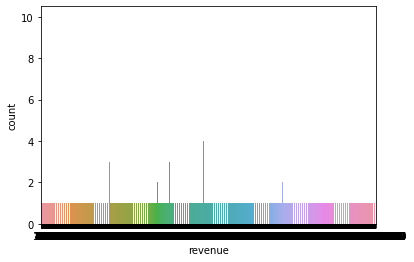

In [ ]:
sns.countplot('revenue',data=box_office)

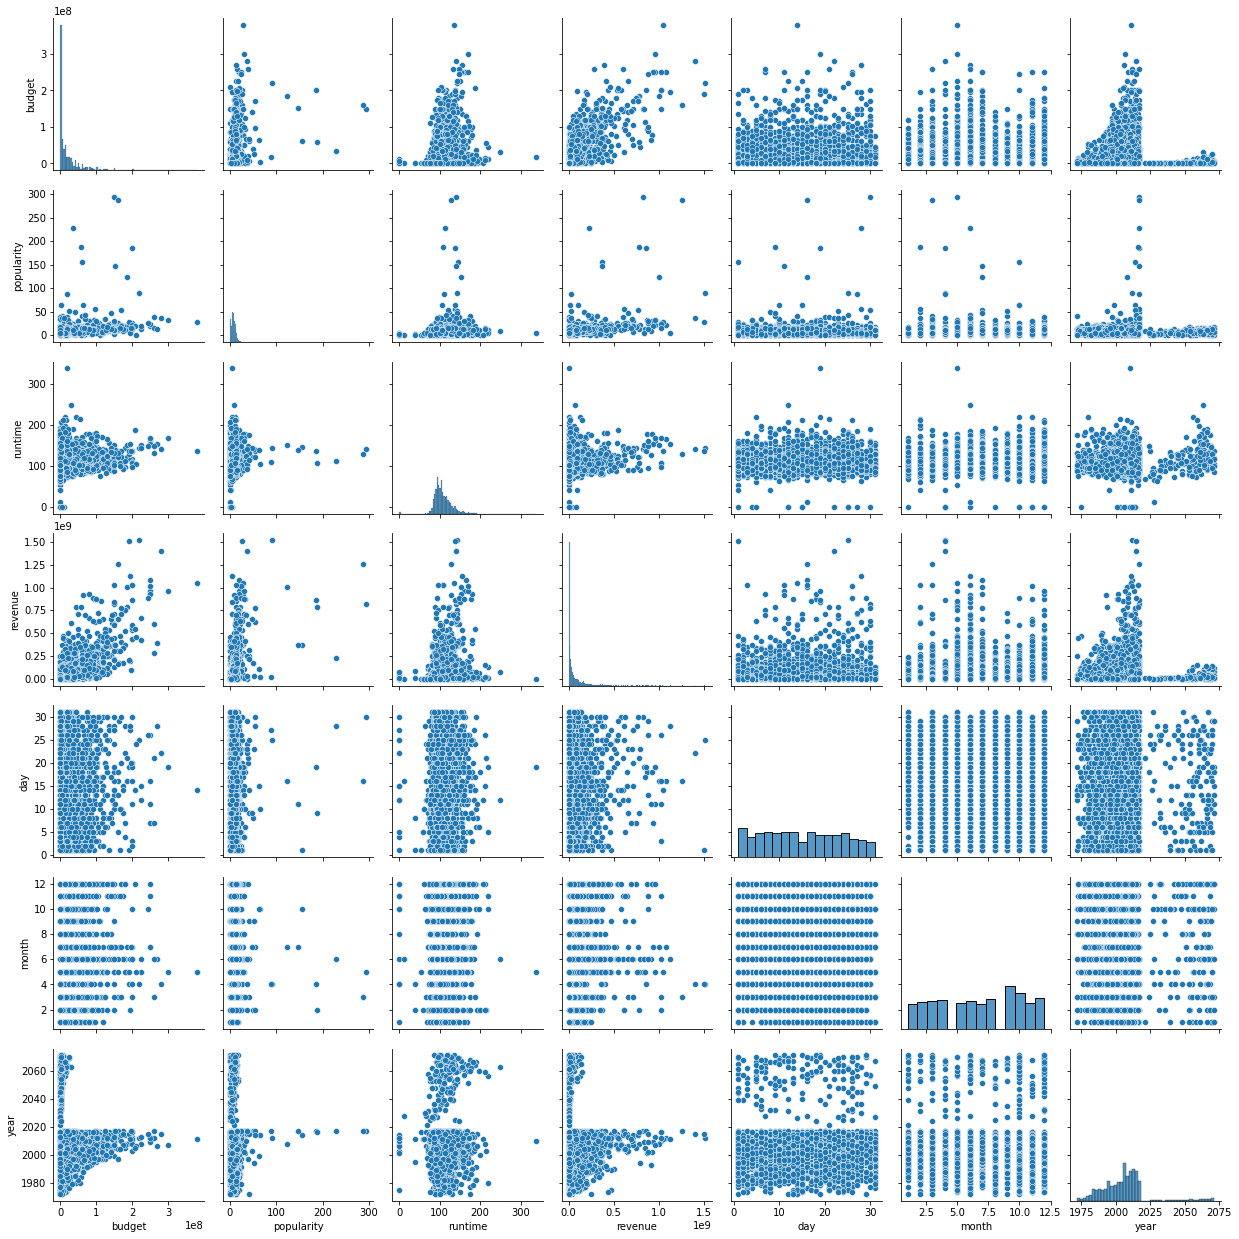

In [ ]:
sns.pairplot(box_office)

## Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
tmdb = LabelEncoder()

In [ ]:
box_office.head()

,budget,genres,original_language,popularity,runtime,spoken_languages,status,title,revenue,day,month,year
0,14000000,696,7,6.575393,93.0,262,0,1045,12314651,20,2,2015
1,40000000,645,7,8.248895,113.0,262,0,2546,95149435,6,8,2004
2,3300000,391,7,64.299990,105.0,262,0,2903,13092000,10,10,2014
3,1200000,733,13,3.174936,122.0,175,0,1183,16000000,9,3,2012
4,0,589,18,1.148070,118.0,338,0,1371,3923970,5,2,2009


In [ ]:
box_office['genres'] = tmdb.fit_transform(box_office['genres'])
box_office['original_language'] = tmdb.fit_transform(box_office['original_language'])
box_office['spoken_languages'] = tmdb.fit_transform(box_office['spoken_languages'])
box_office['status'] = tmdb.fit_transform(box_office['status'])
box_office['title'] = tmdb.fit_transform(box_office['title'])

In [ ]:
box_office.head()

,budget,genres,original_language,popularity,runtime,spoken_languages,status,title,revenue,day,month,year
0,14000000,696,7,6.575393,93.0,262,0,1045,12314651,20,2,2015
1,40000000,645,7,8.248895,113.0,262,0,2546,95149435,6,8,2004
2,3300000,391,7,64.299990,105.0,262,0,2903,13092000,10,10,2014
3,1200000,733,13,3.174936,122.0,175,0,1183,16000000,9,3,2012
4,0,589,18,1.148070,118.0,338,0,1371,3923970,5,2,2009


## Training the dataset

In [ ]:
X = box_office.drop(columns=['revenue'], axis=1)
y = box_office['revenue']

In [ ]:
X.head()

,budget,genres,original_language,popularity,runtime,spoken_languages,status,title,day,month,year
0,14000000,696,7,6.575393,93.0,262,0,1045,20,2,2015
1,40000000,645,7,8.248895,113.0,262,0,2546,6,8,2004
2,3300000,391,7,64.299990,105.0,262,0,2903,10,10,2014
3,1200000,733,13,3.174936,122.0,175,0,1183,9,3,2012
4,0,589,18,1.148070,118.0,338,0,1371,5,2,2009


In [ ]:
y.head()

0    12314651
1    95149435
2    13092000
3    16000000
4     3923970
Name: revenue, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
model = LinearRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state = 16)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1200, 11) (1800, 11) (1200,) (1800,)


In [ ]:
model.fit(X_train, y_train) 

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[-2955343.08640707 -3959690.50984693 -1319347.7577365  ...
 -4219807.76109987 -6666785.95858753 15524252.54888994]


In [ ]:
from sklearn.metrics import explained_variance_score

In [ ]:
explained_variance_score(y_test, y_pred)

0.6511165335905116

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

79692728.6928988

In [ ]:
y_train

516       6000000
1034     38901218
2435      3956913
1756     88658655
2909     48902953
          ...    
635      20158808
1345    149295601
581        461162
2169     23800000
2729    498814908
Name: revenue, Length: 1200, dtype: int64

In [ ]:
y_test

104     149521495
938          1938
152           241
2404    154026136
2603    162000000
          ...    
2678      1081957
1825      5765562
2057       239894
2560     12065892
2382     18124262
Name: revenue, Length: 1800, dtype: int64

In [ ]:
y_pred

array([-2955343.08640707, -3959690.50984693, -1319347.7577365 , ...,
       -4219807.76109987, -6666785.95858753, 15524252.54888994])

In [ ]:
error = mean_squared_error(y_test, y_pred)
print(error)

6350931006519975.0


In [ ]:
error = mean_squared_error(y_test, y_pred, squared = False)
print(error)

79692728.6928988


In [ ]:
error = mean_squared_error(y_test, y_pred, multioutput = 'raw_values')
print(error)

[6.35093101e+15]


In [ ]:
error = mean_squared_error(y_test, y_pred, multioutput = 'uniform_average')
print(error)

6350931006519975.0


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
error = mean_absolute_error(y_test, y_pred)
print(error)

44789941.006416544
